# Import libraries

In [221]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import random

from tqdm.notebook import tqdm

# Initialize environment and parameters

In [222]:
env = gym.make("Taxi-v3").env

params = {
    "discount": 0.9,
    "alpha": 0.1,
    "eps": 0.01,
    "N": 10,
    "num_episodes": 100,
    "max_iters": 10000
}

# Q Learning (Temporal Difference) method

In [254]:
class QLearningTDAgent():
    '''
    Models Temporal Difference RL agent which is trained using Q Learning method
    '''
    def __init__(self, env, params):
        '''
        Method to initialize the Q Learning TD agent model

        Input
        -----
        env     : Environment
        params  : Parameters for training and simulation
        '''
        self.env = env
        self.nS = env.observation_space.n
        self.nA = env.action_space.n
        self.params = params

        self.q_table = np.zeros((self.nS, self.nA))
        self.policy = np.random.randint(self.nA, size=self.nS)

    def get_action(self, state):
        '''
        Method to get action from input state using epsilon greedy policy on Q

        Input
        -----
        state  : Input state

        Output
        ------
        action : Output action based on epsilon greedy policy on Q
        '''
        if random.uniform(0, 1) < self.params["eps"]:
            return self.env.action_space.sample()
        else:
            return np.argmax(self.q_table[state])

    def train_agent(self):
        '''
        Method to train agent using Q Learning method
        '''
        sum_rewards_N = []
        for i in tqdm(range(self.params["N"])):
            sum_rewards = []
            for ep in range(self.params["num_episodes"]):
                sum_R = 0
                state = self.env.reset()
                done = False
                iter = 0

                while not done and iter < self.params["max_iters"]:
                    action = self.get_action(state)

                    obs, reward, done, info = self.env.step(action)
                    sum_R += reward

                    self.q_table[state, action] += self.params["alpha"] * (reward + self.params["discount"] * np.max(self.q_table[obs]) - self.q_table[state, action])

                    state = obs
                    iter += 1

                sum_rewards.append(sum_R)
            sum_rewards_N.append(sum_rewards)
        
        self.policy = self.get_policy()

        return sum_rewards_N

    def get_policy(self):
        '''
        Getter method for policy using state-action values
        '''
        return np.argmax(self.q_table, axis=1)

    def get_policy_state(self, state):
        '''
        Getter method for policy of input state
        '''
        return self.policy[state]

    def get_nS(self):
        '''
        Getter method for number of states
        '''
        return self.nS

    def get_nA(self):
        '''
        Getter method for number of actions
        '''
        return self.nA

    def get_Q_sa_value(self, state, action):
        '''
        Getter method for state-action value
        '''
        return self.q_table[state, action]

  0%|          | 0/10 [00:00<?, ?it/s]

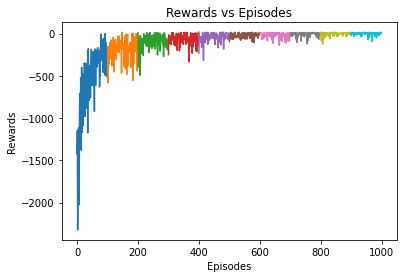

In [255]:
params = {
    "discount": 0.9,
    "alpha": 0.1,
    "eps": 0.01,
    "N": 10,
    "num_episodes": 100,
    "max_iters": 10000
}

q_learning_agent = QLearningTDAgent(env, params)
sum_rewards = q_learning_agent.train_agent()

len1 = len(sum_rewards[0])
x = np.arange(len1)
for sum_rew in sum_rewards:
    plt.plot(x, sum_rew)
    x += len1

plt.title("Rewards vs Episodes")
plt.xlabel("Episodes")
plt.ylabel("Rewards")
plt.show()

The above graph is sum of rewards vs episodes (over N runs depicted by different colors). As subsequent runs (iterations) are run continuously, the plot has been created by appending the values to the right in the plot. Value of N used is 10 i.e., the agent is trained for 10 iterations. And the number of episodes used in training each run is 100. Hence, a total of 1000 episodes is used to train the agent.

We can clearly see that in each iteration (or run), the sum of rewards is increasing as expected. Hence, this means that the agent is learning good state action values (which indirectly depicts the policy). We can see that in first iteration itself, the agent has learnt good state-action values. Initially the sum of rewards is too low because of random policy (or state-action values). Through training, the state-action values are improving due to which the simulations run are giving higher sum of rewards, which means the agent is learning the optimal policy through episodes.

# Double Q Learning (Temporal Difference) method

In [256]:
class DoubleQLearningTDAgent():
    '''
    Models Temporal Difference RL agent which is trained using Double Q Learning method
    '''
    def __init__(self, env, params):
        '''
        Method to initialize the Double Q Learning TD agent model

        Input
        -----
        env     : Environment
        params  : Parameters for training and simulation
        '''
        self.env = env
        self.nS = env.observation_space.n
        self.nA = env.action_space.n
        self.params = params

        self.q_table1 = np.zeros((self.nS, self.nA))
        self.q_table2 = np.zeros((self.nS, self.nA))
        self.policy = np.random.randint(self.nA, size=self.nS)

    def get_action(self, state):
        '''
        Method to get action from input state using epsilon greedy policy on Q

        Input
        -----
        state  : Input state

        Output
        ------
        action : Output action based on epsilon greedy policy on Q
        '''
        if random.uniform(0, 1) < self.params["eps"]:
            return self.env.action_space.sample()
        else:
            return np.argmax(self.q_table1[state] + self.q_table2[state])

    def train_agent(self):
        '''
        Method to train agent using Q Learning method
        '''
        self.q_table1 = np.zeros((self.nS, self.nA))
        self.q_table2 = np.zeros((self.nS, self.nA))
        
        sum_rewards_N = []
        for i in tqdm(range(self.params["N"])):
            sum_rewards = []
            for ep in range(self.params["num_episodes"]):
                sum_R = 0
                state = env.reset()
                done = False
                iter = 0

                while not done and iter < self.params["max_iters"]:
                    action = self.get_action(state)

                    obs, reward, done, info = self.env.step(action)
                    sum_R += reward

                    if random.uniform(0, 1) < 0.5:
                        self.q_table1[state, action] += self.params["alpha"] * (reward + self.params["discount"] * self.q_table2[obs, np.argmax(self.q_table1[obs])] - self.q_table1[state, action])
                    else:
                        self.q_table2[state, action] += self.params["alpha"] * (reward + self.params["discount"] * self.q_table1[obs, np.argmax(self.q_table2[obs])] - self.q_table2[state, action])

                    state = obs
                    iter += 1

                sum_rewards.append(sum_R)
            sum_rewards_N.append(sum_rewards)

        self.policy = self.get_policy()

        return sum_rewards_N

    def get_policy(self):
        '''
        Getter method for policy using state-action values
        '''
        return np.argmax(self.q_table1, axis=1)

    def get_policy_state(self, state):
        '''
        Getter method for policy of input state
        '''
        return self.policy[state]

    def get_nS(self):
        '''
        Getter method for number of states
        '''
        return self.nS

    def get_nA(self):
        '''
        Getter method for number of actions
        '''
        return self.nA

    def get_Q_sa_value(self, state, action):
        '''
        Getter method for state-action value
        '''
        return self.q_table1[state, action]

  0%|          | 0/20 [00:00<?, ?it/s]

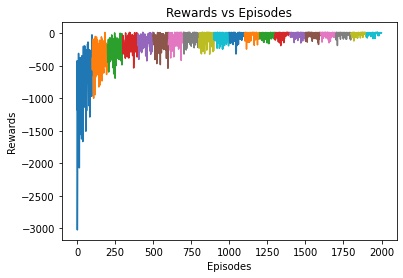

In [267]:
params = {
    "discount": 0.9,
    "alpha": 0.1,
    "eps": 0.01,
    "N": 20,
    "num_episodes": 100,
    "max_iters": 10000
}

double_q_learning_agent = DoubleQLearningTDAgent(env, params)
sum_rewards = double_q_learning_agent.train_agent()

len1 = len(sum_rewards[0])
x = np.arange(len1)
for sum_rew in sum_rewards:
    plt.plot(x, sum_rew)
    x += len1
    
plt.title("Rewards vs Episodes")
plt.xlabel("Episodes")
plt.ylabel("Rewards")
plt.show()

The above graph is sum of rewards vs episodes (over N runs depicted by different colors). As subsequent runs (iterations) are run continuously, the plot has been created by appending the values to the right in the plot. Value of N used is 15 i.e., the agent is trained for 15 iterations. And the number of episodes used in training each run is 100. Hence, a total of 1000 episodes is used to train the agent.

We can clearly see that in each iteration (or run), the sum of rewards is increasing as expected. Hence, this means that the agent is learning good state action values (which indirectly depicts the policy). We can see that in first iteration itself, the agent has learnt good state-action values. Initially the sum of rewards is too low because of random policy (or state-action values). Through training, the state-action values are improving due to which the simulations run are giving higher sum of rewards, which means the agent is learning the optimal policy through episodes.

However, when we compare this agent with Q learning agent, we can see that in Q learning agent plot, the sum of rewards converged at 9th run. However, in this double Q loearning plot, we see that it converges to 0 at around 18th run.

# Sarsa (Temporal Difference) method

In [259]:
class SarsaTDAgent():
    '''
    Models Temporal Difference RL agent which is trained using SARSA method
    '''
    def __init__(self, env, params):
        '''
        Method to initialize the SARSA agent model

        Input
        -----
        env     : Environment
        params  : Parameters for training and simulation
        '''
        self.env = env
        self.nS = env.observation_space.n
        self.nA = env.action_space.n
        self.params = params

        self.q_table = np.zeros((self.nS, self.nA))
        self.policy = np.random.randint(self.nA, size=self.nS)

    def get_action(self, state):
        '''
        Method to get action from input state using epsilon greedy policy on Q

        Input
        -----
        state  : Input state

        Output
        ------
        action : Output action based on epsilon greedy policy on Q
        '''
        if random.uniform(0, 1) < self.params["eps"]:
            return self.env.action_space.sample()
        else:
            return np.argmax(self.q_table[state])

    def train_agent(self):
        '''
        Method to train agent using SARSA method
        '''
        self.q_table = np.zeros((self.nS, self.nA))
        
        sum_rewards_N = []
        for i in tqdm(range(self.params["N"])):       
            sum_rewards = []
            for ep in range(self.params["num_episodes"]):
                sum_R = 0
                state = env.reset()
                done = False
                iter = 0

                action = self.get_action(state)

                while not done and iter < self.params["max_iters"]:
                    obs, reward, done, info = self.env.step(action)
                    sum_R += reward

                    next_action = self.get_action(obs)

                    self.q_table[state, action] += self.params["alpha"] * (reward + self.params["discount"] * self.q_table[obs, next_action] - self.q_table[state, action])

                    state = obs
                    action = next_action
                    iter += 1

                sum_rewards.append(sum_R)
            sum_rewards_N.append(sum_rewards)

        self.policy = self.get_policy()
        
        return sum_rewards_N

    def get_policy(self):
        '''
        Getter method for policy using state-action values
        '''
        return np.argmax(self.q_table, axis=1)

    def get_policy_state(self, state):
        '''
        Getter method for policy of input state
        '''
        return self.policy[state]

    def get_nS(self):
        '''
        Getter method for number of states
        '''
        return self.nS

    def get_nA(self):
        '''
        Getter method for number of actions
        '''
        return self.nA

    def get_Q_sa_value(self, state, action):
        '''
        Getter method for state-action value
        '''
        return self.q_table[state, action]

  0%|          | 0/10 [00:00<?, ?it/s]

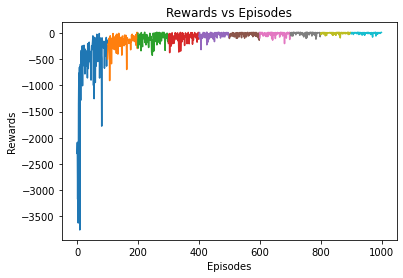

In [261]:
params = {
    "discount": 0.9,
    "alpha": 0.1,
    "eps": 0.01,
    "N": 10,
    "num_episodes": 100,
    "max_iters": 10000
}

sarsa_agent = SarsaTDAgent(env, params)
sum_rewards = sarsa_agent.train_agent()

len1 = len(sum_rewards[0])
x = np.arange(len1)
for sum_rew in sum_rewards:
    plt.plot(x, sum_rew)
    x += len1
    
plt.title("Rewards vs Episodes")
plt.xlabel("Episodes")
plt.ylabel("Rewards")
plt.show()

The above graph is sum of rewards vs episodes (over N runs depicted by different colors). As subsequent runs (iterations) are run continuously, the plot has been created by appending the values to the right in the plot. Value of N used is 10 i.e., the agent is trained for 10 iterations. And the number of episodes used in training each run is 100. Hence, a total of 1000 episodes is used to train the agent.

We can clearly see that in each iteration (or run), the sum of rewards is increasing as expected. Hence, this means that the agent is learning good state action values (which indirectly depicts the policy). We can see that in first iteration itself, the agent has learnt good state-action values. Initially the sum of rewards is too low because of random policy (or state-action values). Through training, the state-action values are improving due to which the simulations run are giving higher sum of rewards, which means the agent is learning the optimal policy through episodes.

We see that for this agent, the sum of rewards values are converging by 6th iteration (run). Hence, this agent is learning faster than previous two agents which were trained on Q Learning and Double Q learning methods.

# Expected Sarsa (Temporal Difference) method

In [264]:
class ExpectedSarsaTDAgent():
    '''
    Models Temporal Difference RL agent which is trained using Expected SARSA method
    '''
    def __init__(self, env, params):
        '''
        Method to initialize the Expected SARSA agent model

        Input
        -----
        env     : Environment
        params  : Parameters for training and simulation
        '''
        self.env = env
        self.nS = env.observation_space.n
        self.nA = env.action_space.n
        self.params = params

        self.q_table = np.zeros((self.nS, self.nA))
        self.policy = np.random.randint(self.nA, size=self.nS)

    def get_action(self, state):
        '''
        Method to get action from input state using epsilon greedy policy on Q

        Input
        -----
        state  : Input state

        Output
        ------
        action : Output action based on epsilon greedy policy on Q
        '''
        if random.uniform(0, 1) < self.params["eps"]:
            return self.env.action_space.sample()
        else:
            return np.argmax(self.q_table[state])
    
    def get_probs(self, state):
        '''
        Method to get probabilities of actions of input state

        Input
        -----
        state : Input state

        Output
        ------
        probs : List of probabilities of actions from input state
        '''
        probs = np.ones(self.nA) * self.params["eps"] / self.nA
        probs[np.argmax(self.q_table[state])] = 1 - self.params["eps"] + self.params["eps"] / self.nA
        return probs

    def train_agent(self):
        '''
        Method to train agent using Expected SARSA method
        '''
        self.q_table = np.zeros((self.nS, self.nA))

        sum_rewards_N = []
        for i in tqdm(range(self.params["N"])):        
            sum_rewards = []
            for ep in range(self.params["num_episodes"]):
                sum_R = 0
                state = self.env.reset()
                done = False
                iter = 0

                action = self.get_action(state)
                
                while not done and iter < self.params["max_iters"]:
                    obs, reward, done, info = self.env.step(action)
                    sum_R += reward

                    next_action = self.get_action(obs)
                    self.q_table[state, action] += self.params["alpha"] * (reward + self.params["discount"] * np.dot(self.q_table[obs], self.get_probs(obs)) - self.q_table[state, action])

                    state = obs
                    action = next_action
                    iter += 1

                sum_rewards.append(sum_R)
            sum_rewards_N.append(sum_rewards)

        self.policy = self.get_policy()
        
        return sum_rewards_N

    def get_policy(self):
        '''
        Getter method for policy using state-action values
        '''
        return np.argmax(self.q_table, axis=1)

    def get_policy_state(self, state):
        '''
        Getter method for policy of input state
        '''
        return self.policy[state]

    def get_nS(self):
        '''
        Getter method for number of states
        '''
        return self.nS

    def get_nA(self):
        '''
        Getter method for number of actions
        '''
        return self.nA

    def get_Q_sa_value(self, state, action):
        '''
        Getter method for state-action value
        '''
        return self.q_table[state, action]

  0%|          | 0/10 [00:00<?, ?it/s]

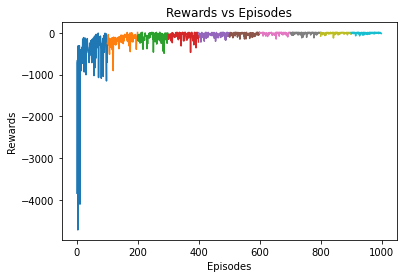

In [265]:
params = {
    "discount": 0.9,
    "alpha": 0.1,
    "eps": 0.01,
    "N": 10,
    "num_episodes": 100,
    "max_iters": 10000
}

expected_sarsa_agent = ExpectedSarsaTDAgent(env, params)
sum_rewards = expected_sarsa_agent.train_agent()

len1 = len(sum_rewards[0])
x = np.arange(len1)
for sum_rew in sum_rewards:
    plt.plot(x, sum_rew)
    x += len1
    
plt.title("Rewards vs Episodes")
plt.xlabel("Episodes")
plt.ylabel("Rewards")
plt.show()

The above graph is sum of rewards vs episodes (over N runs depicted by different colors). As subsequent runs (iterations) are run continuously, the plot has been created by appending the values to the right in the plot. Value of N used is 10 i.e., the agent is trained for 10 iterations. And the number of episodes used in training each run is 100. Hence, a total of 1000 episodes is used to train the agent.

We can clearly see that in each iteration (or run), the sum of rewards is increasing as expected. Hence, this means that the agent is learning good state action values (which indirectly depicts the policy). We can see that in first iteration itself, the agent has learnt good state-action values. Initially the sum of rewards is too low because of random policy (or state-action values). Through training, the state-action values are improving due to which the simulations run are giving higher sum of rewards, which means the agent is learning the optimal policy through episodes.

This agent seems to be converging by 6th iterations, similar to previous agent which was trained on Sarsa method. However, we can see that in first run, the variance of this agent is little lesser and the sum of rewards in first few episodes is lower than the agent trained using Sarsa. This is because this uses expected value of state action values, whereas Sarsa uses max state action value.

# Comparison (Extended)

We can see that Q learning and Double Q Learning methods are converging late and the variance around 0 is higher when compared to Sarsa and Expected Sarsa. This is because in general Q learning method learns more compact and shorter part policies due to which there is a chance of falling into terminal states with negative rewards. Whereas Sarsa methods learn policies which are safer in longer term. Hence, we see that in Sarsa methods, the sum of rewards are closer to 0 in later half of the episodes, where in Q learning methods, there is quite a bit variance around 0 in later half of the episodes.